# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [2]:
df_pred = pd.read_csv('//home/apta/neuralnetwork-AD/rnn-apta/results/vector/Monday-WorkingHours_training_21/result-lstm-tcp21-hl2-seq2-do0.2-oov4000-combined-00021.pcap.csv', 
                      names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])

df_truth = pd.read_csv('/home/apta/UNSW-NB15/NUSW-NB15_GT.csv')

In [3]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,175.45.176.0-45235-149.171.126.16-21-tcp,0.967213,1,1,1,28002.610169,1,1,1
1,175.45.176.3-1025-149.171.126.11-21-tcp,0.622222,1,1,1,18098.116279,1,1,1
2,175.45.176.1-28136-149.171.126.11-21-tcp,0.854701,1,1,1,23783.773913,1,1,1
3,175.45.176.2-43663-149.171.126.15-21-tcp,0.870229,1,1,1,23302.170543,1,1,1
4,175.45.176.3-64709-149.171.126.15-21-tcp,0.879433,1,1,1,24904.733813,1,1,1


In [4]:
df_truth.head()

,Start time,Last time,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.
0,1421927414,1421927416,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.
1,1421927415,1421927415,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.
2,1421927416,1421927416,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.
3,1421927417,1421927417,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.
4,1421927418,1421927418,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.


## Exploratory Data Analysis

In [5]:
df_pred[['b_iqr']].value_counts()

b_iqr
1        25208
0           95
Name: count, dtype: int64

In [6]:
df_pred[['b_zscore']].value_counts()

b_zscore
1           25173
0             130
Name: count, dtype: int64

In [7]:
df_truth.isnull().sum()

Start time                0
Last time                 0
Attack category           0
Attack subcategory     4097
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               1
Attack Reference      50638
.                         0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [8]:
df_truth['Source Port'] = df_truth['Source Port'].astype(int)
df_truth['Destination Port'] =df_truth['Destination Port'].astype(int)
df_truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174347 entries, 0 to 174346
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Start time          174347 non-null  int64 
 1   Last time           174347 non-null  int64 
 2   Attack category     174347 non-null  object
 3   Attack subcategory  170250 non-null  object
 4   Protocol            174347 non-null  object
 5   Source IP           174347 non-null  object
 6   Source Port         174347 non-null  int64 
 7   Destination IP      174347 non-null  object
 8   Destination Port    174347 non-null  int64 
 9   Attack Name         174346 non-null  object
 10  Attack Reference    123709 non-null  object
 11  .                   174347 non-null  object
dtypes: int64(4), object(8)
memory usage: 16.0+ MB


In [9]:
df_truth['Source Port'] = df_truth['Source Port'].astype(str)
df_truth['Destination Port'] =df_truth['Destination Port'].astype(str)
df_truth['id'] = df_truth[['Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol']].apply("-".join, axis=1)

## Making Predictions

In [10]:
df_pred["predicted"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

In [11]:
df_pred[df_pred['predicted']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,predicted
26,175.45.176.3-42152-149.171.126.13-21-tcp,0.846847,1,1,1,22478.385321,1,1,1,1
36,175.45.176.0-41600-149.171.126.14-21-tcp,0.771429,1,1,1,17027.058824,1,1,1,1
48,175.45.176.0-9886-149.171.126.17-21-tcp,0.874074,1,1,1,24088.616541,1,1,1,1
82,175.45.176.1-62639-149.171.126.14-21-tcp,0.870229,1,1,1,24488.356589,1,1,1,1
84,175.45.176.1-12535-149.171.126.19-21-tcp,0.872180,1,1,1,24576.717557,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
24856,175.45.176.1-11178-149.171.126.13-21-tcp,0.906250,1,1,1,23545.712766,1,1,1,1
24860,175.45.176.3-36366-149.171.126.11-21-tcp,0.859504,1,1,1,23079.462185,1,1,1,1
24879,175.45.176.1-19904-149.171.126.16-21-tcp,0.868217,1,1,1,24397.212598,1,1,1,1
24906,175.45.176.3-9103-149.171.126.17-21-tcp,0.857143,1,1,1,23894.752137,1,1,1,1


In [12]:
df_pred[df_pred['predicted']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,predicted
0,175.45.176.0-45235-149.171.126.16-21-tcp,0.967213,1,1,1,28002.610169,1,1,1,0
1,175.45.176.3-1025-149.171.126.11-21-tcp,0.622222,1,1,1,18098.116279,1,1,1,0
2,175.45.176.1-28136-149.171.126.11-21-tcp,0.854701,1,1,1,23783.773913,1,1,1,0
3,175.45.176.2-43663-149.171.126.15-21-tcp,0.870229,1,1,1,23302.170543,1,1,1,0
4,175.45.176.3-64709-149.171.126.15-21-tcp,0.879433,1,1,1,24904.733813,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
25298,59.166.0.8-55795-149.171.126.6-21-tcp,0.736364,1,1,1,18386.166667,1,1,1,0
25299,149.171.126.1-21-59.166.0.7-7753-tcp,0.986486,1,1,1,23422.650685,1,1,1,0
25300,59.166.0.3-7585-149.171.126.2-21-tcp,0.736364,1,1,1,18386.166667,1,1,1,0
25301,59.166.0.1-27560-149.171.126.3-21-tcp,0.828125,1,1,1,20933.032258,1,1,1,0


In [13]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,predicted
0,175.45.176.0-45235-149.171.126.16-21-tcp,0.967213,1,1,1,28002.610169,1,1,1,0
1,175.45.176.3-1025-149.171.126.11-21-tcp,0.622222,1,1,1,18098.116279,1,1,1,0
2,175.45.176.1-28136-149.171.126.11-21-tcp,0.854701,1,1,1,23783.773913,1,1,1,0
3,175.45.176.2-43663-149.171.126.15-21-tcp,0.870229,1,1,1,23302.170543,1,1,1,0
4,175.45.176.3-64709-149.171.126.15-21-tcp,0.879433,1,1,1,24904.733813,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
25298,59.166.0.8-55795-149.171.126.6-21-tcp,0.736364,1,1,1,18386.166667,1,1,1,0
25299,149.171.126.1-21-59.166.0.7-7753-tcp,0.986486,1,1,1,23422.650685,1,1,1,0
25300,59.166.0.3-7585-149.171.126.2-21-tcp,0.736364,1,1,1,18386.166667,1,1,1,0
25301,59.166.0.1-27560-149.171.126.3-21-tcp,0.828125,1,1,1,20933.032258,1,1,1,0


In [14]:
df_pred[['predicted']].value_counts()

predicted
0            23550
1             1753
Name: count, dtype: int64

In [15]:
df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv('../mcnemar/ftp/pred_0.0.csv')

## Calculating Score

In [16]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [17]:
df_pred[['b_zscore']]

,b_zscore
0,1
1,1
2,1
3,1
4,1
...,...
25298,1
25299,1
25300,1
25301,1


### Detection Rate

In [18]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['predicted'], df_pred[i].astype(int))
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['predicted'], df_pred[i].astype(int))
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 1.0
Recall-Binary-b_iqr: 1.0
Recall-Binary-b_zscore: 1.0
Recall-Floating-f_mean: 1.0
Recall-Floating-f_iqr: 1.0
Recall-Floating-f_zscore: 1.0


### Confussion Matrix

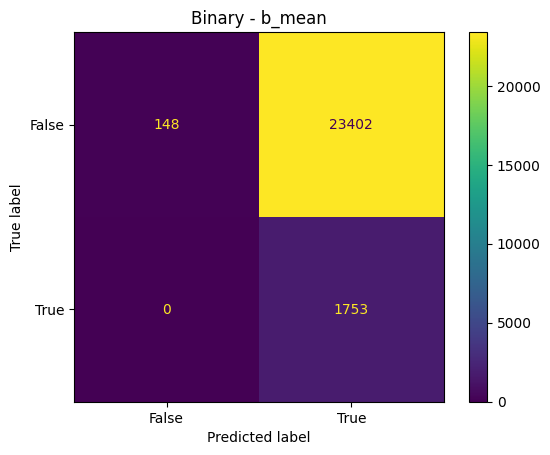

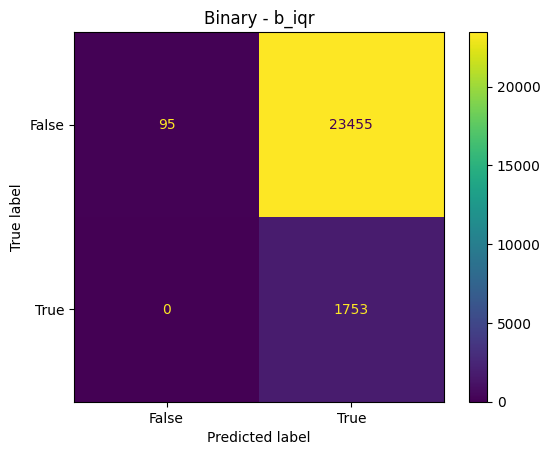

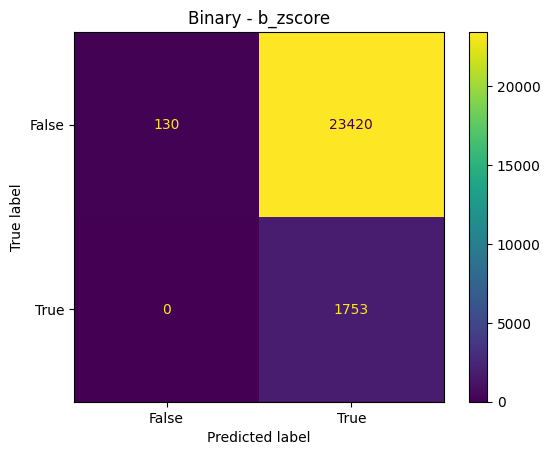

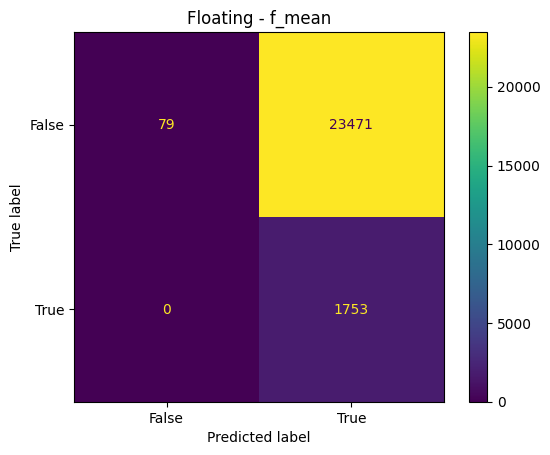

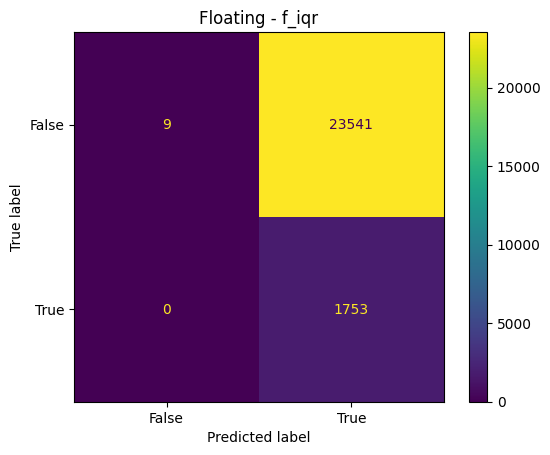

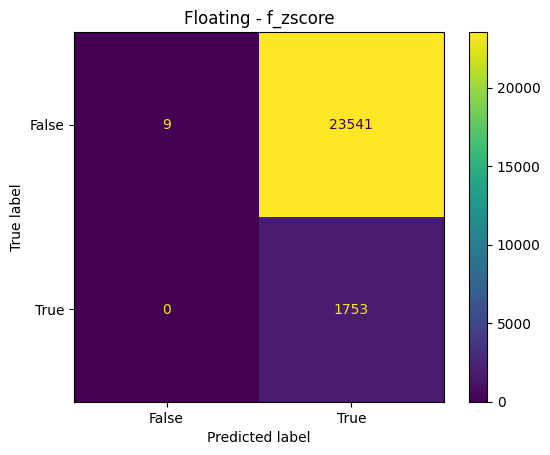

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['predicted'], df_pred[i].astype(int))
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['predicted'], df_pred[i].astype(int))
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [20]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['predicted'], df_pred[i].astype(int)).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['predicted'], df_pred[i].astype(int)).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.2724842229614201
F2-Binary-b_iqr: 0.27203600248292986
F2-Binary-b_zscore: 0.2723318315985708
F2-Floating-f_mean: 0.271900980270505
F2-Floating-f_iqr: 0.2713118306196991
F2-Floating-f_zscore: 0.2713118306196991


### FPR Score

In [21]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['predicted'], df_pred[i].astype(int)).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['predicted'], df_pred[i].astype(int)).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.9937154989384289
FPR-Binary-b_iqr: 0.9959660297239915
FPR-Binary-b_zscore: 0.99447983014862
FPR-Floating-f_mean: 0.9966454352441614
FPR-Floating-f_iqr: 0.9996178343949045
FPR-Floating-f_zscore: 0.9996178343949045


In [22]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['predicted'], df_pred[i].astype(int))
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['predicted'], df_pred[i].astype(int))
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.07512943129273209
Accuracy-Binary-b_iqr: 0.07303481800577007
Accuracy-Binary-b_zscore: 0.07441805319527328
Accuracy-Floating-f_mean: 0.07240248191914002
Accuracy-Floating-f_iqr: 0.06963601154013357
Accuracy-Floating-f_zscore: 0.06963601154013357


In [23]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,F2 Score,FPR Score,Accuracy Score
b_mean,1.0,0.272484,0.993715,0.075129
b_iqr,1.0,0.272036,0.995966,0.073035
b_zscore,1.0,0.272332,0.994480,0.074418
f_mean,1.0,0.271901,0.996645,0.072402
f_iqr,1.0,0.271312,0.999618,0.069636
f_zscore,1.0,0.271312,0.999618,0.069636


In [24]:
df_score.to_excel('score_ftp_0.0.xlsx')